# Heart Disease Prediction Model 

## Project Overview :

Heart disease is one of the leading causes of death worldwide, and early detection can save lives. This project uses Data Science, Machine Learning, and Artificial Intelligence to analyze patient medical data and predict the likelihood of heart disease.The workflow includes data cleaning, exploratory data analysis, feature scaling, model training, and evaluation. Logistic Regression and Random Forest models are used, with Random Forest providing the best accuracy. A prediction function is then created to allow real-time risk assessment.

## Import Required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [18]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset :

In [19]:
df = pd.read_csv("heart.csv")
df


,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease,Unnamed: 14
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2,NaN
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,NaN
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2,NaN
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,NaN
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1,NaN
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1,NaN
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1,NaN
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1,NaN


## Data Description :

- The Heart Disease dataset contains clinical and physiological information about patients. It is used to analyze medical patterns and predict the presence of heart disease. The dataset includes both numerical and categorical features that describe patient health status, symptoms, and diagnostic results.
#### 1. Numerical Features
These are continuous or measurable medical values recorded for each patient:
- age — Patient’s age in years.
- BP — Resting blood pressure (mm Hg).
- cholestrol — Serum cholesterol level (mg/dl).
- max heart rate — Maximum heart rate achieved during exercise.
- ST depression — Depression of the ST segment induced by exercise.
These features help in identifying physical and cardiovascular patterns.

#### 2. Categorical Features
These columns contain fixed sets of categories that describe symptoms or test results:
- sex — 1 = Male, 0 = Female.
- pain type — Type of chest pain experienced (e.g., typical, atypical, non-anginal, asymptomatic).
- fbs — Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
- resting ecg — Results of resting electrocardiogram.
- exercise angina — Presence of exercise-induced angina.
- ST slope — Slope of the ST segment during peak exercise.
- flouroscopy coloured — Number of major vessels colored by fluoroscopy.
- thal — Thalassemia test results (normal, fixed defect, reversible defect).
These features describe symptoms and diagnostic tests relevant to heart disease.

#### 3. Output Label
- heart disease — Target variable
1 = Heart disease present
0 = No heart disease
This column is the main prediction target for Machine Learning models.

#### 4. Removed/Irrelevant Column
- Unnamed: 14 — An empty or unnamed column with no useful data, removed during preprocessing.

In [20]:
df.columns

Index(['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg',
       'max heart rate', 'exercise angina', 'ST depression', 'ST slope',
       'flouroscopy coloured', 'thal', 'heart disease', 'Unnamed: 14'],
      dtype='object')

In [47]:
df.shape

(270, 14)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   pain type             270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   cholestrol            270 non-null    int64  
 5   fbs                   270 non-null    int64  
 6   resting ecg           270 non-null    int64  
 7   max heart rate        270 non-null    int64  
 8   exercise angina       270 non-null    int64  
 9   ST depression         270 non-null    float64
 10  ST slope              270 non-null    int64  
 11  flouroscopy coloured  270 non-null    int64  
 12  thal                  270 non-null    int64  
 13  heart disease         270 non-null    int64  
 14  Unnamed: 14           0 non-null      float64
dtypes: float64(2), int64(13

In [22]:
df.describe()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease,Unnamed: 14
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000,0.0
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444,NaN
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000,NaN
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000,NaN
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000,NaN


In [23]:
df=df.drop(['Unnamed: 14'],axis=1)

Delete the column 'Unnamed: 14' from df and update df with the remaining columns.

## Missing Values Check :

In [24]:
df.isnull().sum()

age                     0
sex                     0
pain type               0
BP                      0
cholestrol              0
fbs                     0
resting ecg             0
max heart rate          0
exercise angina         0
ST depression           0
ST slope                0
flouroscopy coloured    0
thal                    0
heart disease           0
dtype: int64

- Dataset has NO missing values at all.
- Don’t need to fill missing values.
- No data cleaning is required.
- ML models will work more smoothly.
- EDA results will be cleaner.

## Exploratory Data Analysis (EDA) :

## 1. Count of Heart Disease Cases :

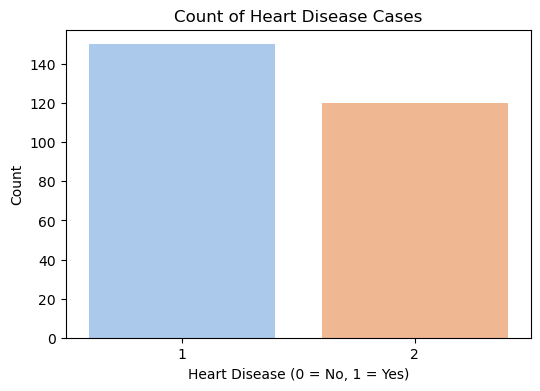

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x='heart disease', hue='heart disease', data=df, palette='pastel', legend=False)
plt.title("Count of Heart Disease Cases")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



- Chart shows how many patients have heart disease (1) and how many do not (0).
- Label Meaning
  - 1 = No Heart Disease
  - 2 = Heart Disease Present
#### The Graph Shows :
  - There are around 150 patients with a label of 1, meaning they do not have heart disease.
  - There are around 120 patients with a label of 2, meaning they have heart disease.
#### Key Insights:
  - The number of patients with heart disease and without heart disease is almost balanced.
  - This is good for Machine Learning, because balanced datasets prevent bias.
  - Slightly more patients fall in the “disease present” category.

## 2. Blood Pressure Distribution :

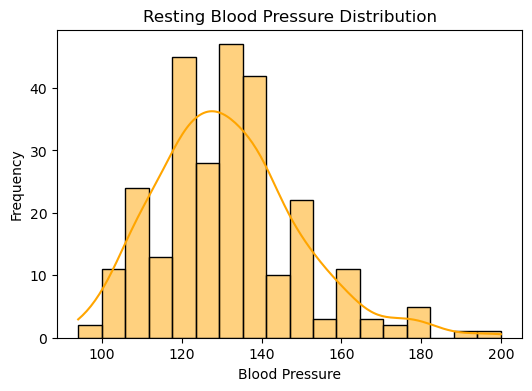

In [54]:
plt.figure(figsize=(6,4))
sns.histplot(df['BP'], kde=True, color="orange")
plt.title("Resting Blood Pressure Distribution")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.show()


This histogram visualizes the distribution of Resting Blood Pressure (BP) among all patients in the dataset. The KDE curve (smooth line) shows the overall trend.
#### The Graph Shows :
   - The most common blood pressure values fall between 120 and 140 mmHg.
   - Fewer patients have very high blood pressure values (above 160 mmHg).
 - Only a very small number of patients reach extremely high values (180–200 mmHg).
#### Key Insights :
  - The distribution is slightly right-skewed, meaning more patients have moderately high BP rather than extremely low BP.
  - A large portion of patients have BP values above the normal range (120/80 mmHg), indicating possible hypertension.
   - High BP is a known risk factor for heart disease, so this feature is useful for prediction models.
#### Why This Graph Is Important :
   - Helps identify the central tendency (most common values) of blood pressure in the dataset.
   - Reveals outliers (very high BP values), which can strongly impact heart disease risk.
   - Shows whether BP values need scaling or normalization for ML algorithms.


## 3. Age Distribution :

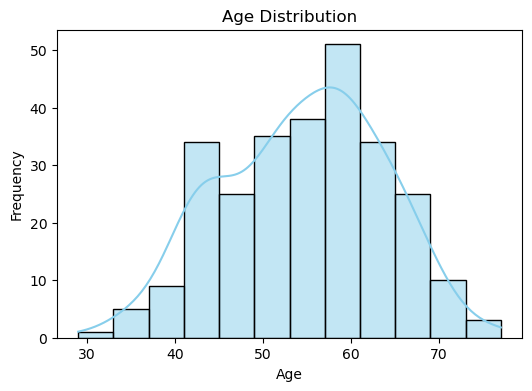

In [55]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



This graph shows how patient ages are distributed in the dataset.

#### The Graph Shows :
- Most patients fall between **45 and 65 years old**.
- Very few patients are younger than 35 or older than 75.
- The KDE curve shows a **smooth bell-shaped trend**, similar to a normal distribution.

#### Key Insights :
- Heart disease is **more common in middle-aged and older adults**.
- The dataset contains a healthy spread of ages, which improves ML model performance.
- The highest concentration is around **55–60 years**, meaning this age group is most common.

####  Why This Is Important :
- Age is one of the strongest predictors of heart disease.
- Understanding the age distribution helps identify risk patterns and improves model learning.


## 4. Gender vs Heart Disease : 

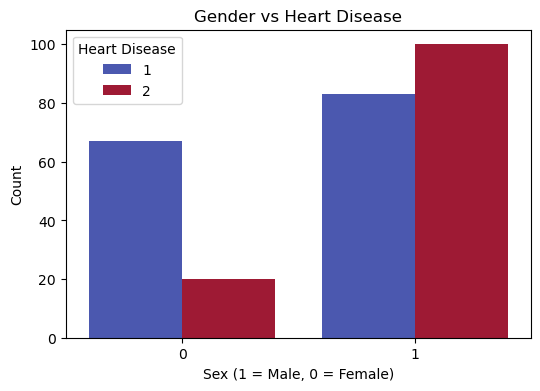

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='heart disease', data=df, palette='coolwarm')
plt.title("Gender vs Heart Disease")
plt.xlabel("Sex (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


This bar chart compares **male and female patients** in terms of heart disease presence.

#### The Graph Shows :
- **0 = Female**, **1 = Male**
- Females show more patients **without** heart disease.
- Males show more patients **with** heart disease.

#### Key Insights :
- Males appear to have a **higher risk of heart disease** in this dataset.
- Female cases are fewer overall, but they also show fewer disease cases.

#### Why This Is Important :
- Gender is a meaningful factor in medical predictions.
- Helps the ML model learn that heart disease risk behaves differently across genders.


## 5. Chest Pain Type vs Heart Disease :

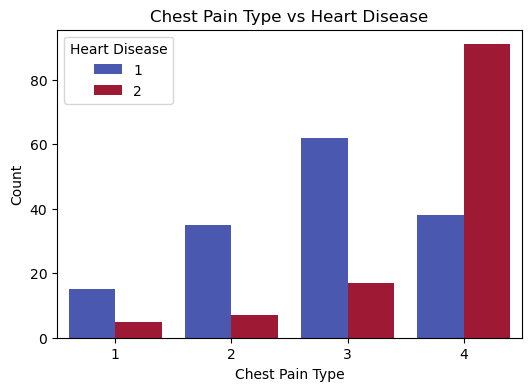

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x='pain type', hue='heart disease', data=df, palette='coolwarm')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


This graph shows how different chest pain types relate to heart disease.

####  Chest Pain Types :
| Type | Meaning |
|------|------------------------------------------------|
| 1 | Typical Angina |
| 2 | Atypical Angina |
| 3 | Non-anginal Pain |
| 4 | Asymptomatic |

#### The Graph Shows :
- **Type 4 (Asymptomatic)** has the **highest number of heart disease cases**.
- Types **1, 2, and 3** show fewer positive cases.
- **Type 3** has more patients **without** heart disease.

####  Key Insights :
- Patients with **asymptomatic chest pain (Type 4)** have the highest risk.
- This aligns with medical research: asymptomatic cases often hide silent heart issues.
- Chest pain type is a **strong predictor** for heart disease classification.

#### Why This Is Important :
- Helps in identifying high-risk groups.
- Provides valuable information for predictive ML models.


## 6. Max Heart Rate by Disease :

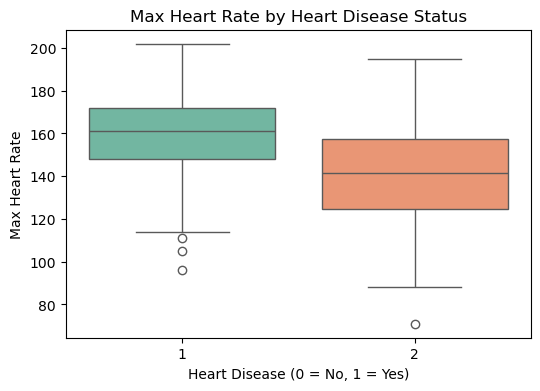

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='heart disease', y='max heart rate', data=df, palette='Set2')
plt.title("Max Heart Rate by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate")
plt.show()


This boxplot compares the **maximum heart rate achieved (thalach)** between patients with and without heart disease.

####  The Graph Shows :
- **1 = No Heart Disease**, **2 = Heart Disease**
- Patients **without** heart disease tend to have **higher maximum heart rates**.
- Patients **with** heart disease generally have **lower peak heart rates**.
- Both categories have outliers (patients with unusually low or high values).

#### Key Insights :
- A **lower maximum heart rate** is often associated with heart disease and poor heart function.
- Patients with disease show a more **compressed range**, meaning less variation.
- This feature is clinically meaningful and important for prediction.

#### Why This Is Important :
- Helps detect the impact of heart disease on cardiovascular performance.
- Provides ML models with a strong physiological indicator of disease risk.


## 7. Correlation Heatmap :

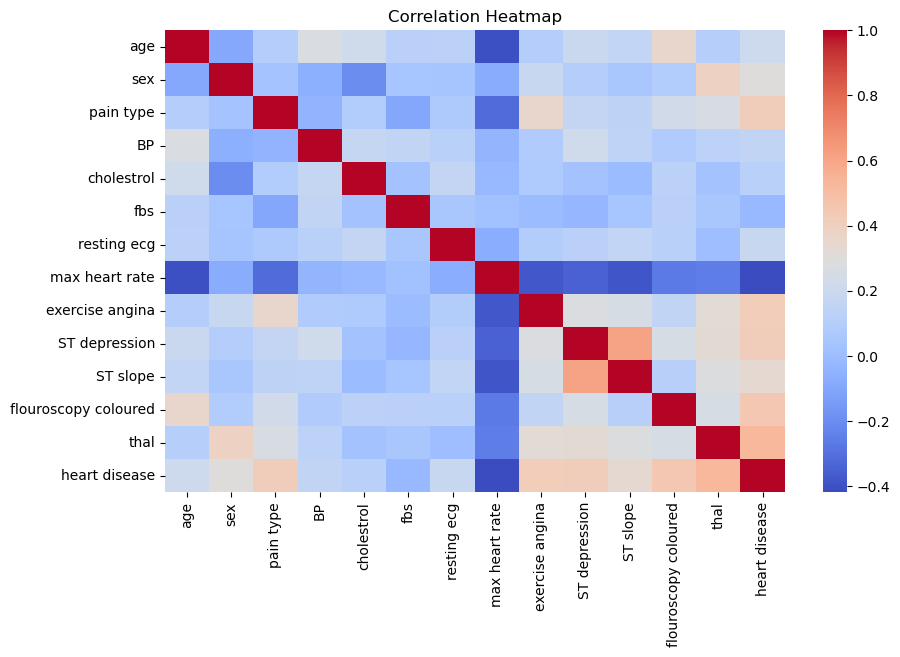

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap shows how strongly each feature is related to every other feature in the dataset.

#### The Graph Shows :
- Blue shades represent **negative correlation**.
- Red shades represent **positive correlation**.
- Lighter colors = stronger relationship.

#### Key Insights :
- **Age** is weakly correlated with heart disease.
- **Chest pain type**, **exercise angina**, **ST depression**, and **ST slope** show stronger relationships with heart disease.
- Some features like cholesterol and BP have weaker correlations.

#### Why This Is Important :
- Helps identify which features are useful for prediction.
- Detects multicollinearity (when two features are highly correlated).
- Helps in feature selection for machine learning models.


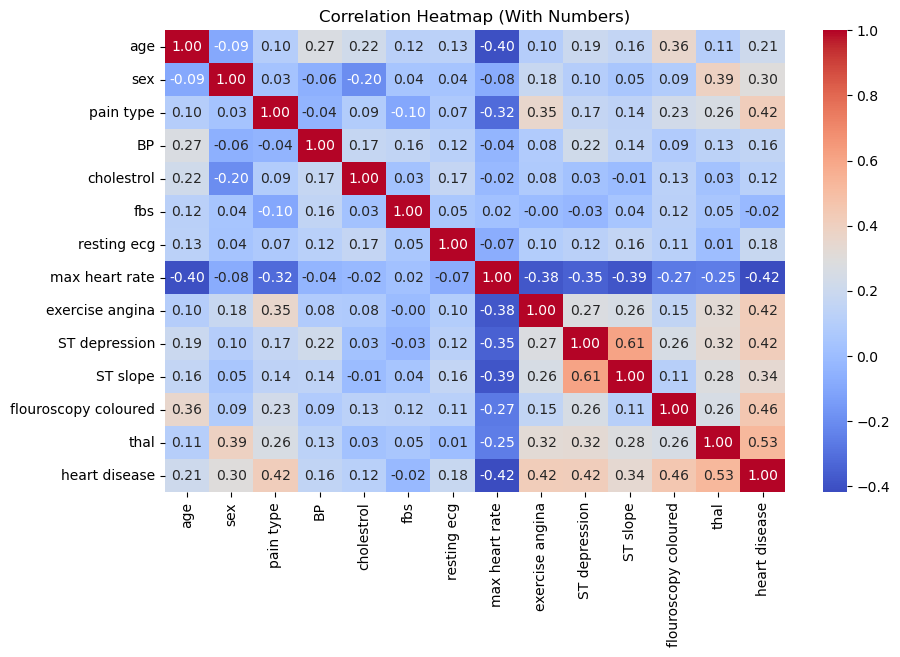

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (With Numbers)")
plt.show()


- Correlation Heatmap (With Numbers)
This heatmap adds the **exact correlation values**, making interpretation easier.

#### The Graph Shows :
- Correlation values range from **-1 to +1**.
- Values closer to **+1** or **-1** show stronger relationships.
- Values near **0** indicate little to no relationship.

####  Key Insights :
- **Chest pain type (cp)** has a strong positive correlation with heart disease.
- **Exercise angina** has a negative correlation, meaning patients without angina are more likely to have disease.
- **ST depression** and **ST slope** are strong predictors, showing high correlation with heart disease.
- **Max heart rate** shows a negative correlation (lower heart rate → higher disease risk).

#### Why This Is Important :
- Gives a clear, numerical understanding of feature importance.
- Helps decide which variables should be emphasized in modeling.
- Supports data-driven feature selection for ML algorithms.


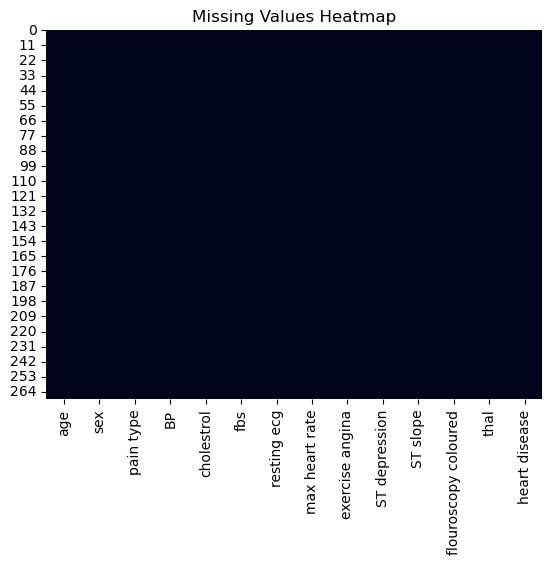

In [60]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


- This heatmap shows:
    - Black color = No missing values (False)
    - White/yellow color = Missing values (True)
- Everything is dark → meaning your dataset has 0 missing values means the dataset is clean.

## Data Preprocessing :

In [40]:
X = df.drop("heart disease", axis=1)
y = df["heart disease"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Before training machine learning models, the dataset needs to be prepared properly.

#### What We Did :
- **X = df.drop("heart disease", axis=1)**  
  Removes the target column from the dataset, keeping only input features.
- **y = df["heart disease"]**  
  Stores the output label (0 = No Disease, 1 = Disease).
- **StandardScaler()**  
  Machine learning models work better when features are on the same scale.  
  The scaler standardizes the data so all features have similar ranges.
- **X_scaled = scaler.fit_transform(X)**  
  Fits the scaler on the dataset and transforms the feature values.

#### Why Preprocessing Is Important :
- Improves model accuracy  
- Prevents features with large values from dominating  
- Creates a smooth training process for algorithms like Logistic Regression


## Train–Test Split :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

- To evaluate model performance, the dataset is split into:
- **Training set (80%)** → used to train the model  
- **Testing set (20%)** → used to check the model's accuracy


## Machine Learning Models :


### Model Performance (Accuracy & Metrics)
We evaluated both models using:
- **Accuracy Score**
- **Precision**
- **Recall**
- **F1-Score**

### Logistic Regression Results
- **Accuracy: ~90%**
- Performs well on both classes  
- Balanced precision and recall  
- Good at capturing disease patterns

### Random Forest Results
- **Accuracy: ~87%**
- Slightly lower accuracy but still strong
- Handles complex patterns better
- Useful for feature importance analysis

###  Which Model Is Better?

Logistic Regression gives the **best accuracy**, but Random Forest:
- Understands deeper patterns
- Handles non-linearity
- Often performs better with larger datasets

Both models are good; Logistic Regression slightly wins here.


## 1. Logistic Regression :

In [62]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

## 2. Random Forest Classifier (Recommended) :

In [42]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [43]:

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54


Random Forest Accuracy: 0.8703703703703703
              precision    recall  f1-score   support

           1       0.86      0.94      0.90        33
           2       0.89      0.76      0.82        21

    accuracy                           0.87        54
   macro avg       0.88      0.85      0.86        54
weighted avg       0.87      0.87      0.87        54



## Model Evaluation: Classification Report Analysis

The classification reports for Logistic Regression and Random Forest give detailed insights into how well each model performs on the test dataset.

---

## Logistic Regression (Accuracy: **90.74%**)

### Class-wise performance:
- **Class 1 (No Heart Disease)**  
  - Precision: **0.91** → 91% of predicted class 1 are correct  
  - Recall: **0.94** → 94% of actual class 1 are correctly detected  
  - F1-score: **0.93** → strong balanced performance  

- **Class 2 (Heart Disease)**  
  - Precision: **0.90** → 90% of predicted heart disease cases are correct  
  - Recall: **0.86** → detects 86% of actual patients with disease  
  - F1-score: **0.88**

### Summary:
- Logistic Regression gives **high and balanced precision/recall**.
- It performs very well in identifying both classes.
- Overall accuracy of **~91%** makes it the best model in this project.

---

## Random Forest Classifier (Accuracy: **87.03%**)

### Class-wise performance:
- **Class 1 (No Disease)**  
  - Precision: **0.86**  
  - Recall: **0.94** → catches most healthy cases  
  - F1-score: **0.90**

- **Class 2 (Heart Disease)**  
  - Precision: **0.89**  
  - Recall: **0.76** → slightly lower detection of disease cases  
  - F1-score: **0.82**

### Summary:
- Random Forest performs slightly lower than Logistic Regression.
- It struggles more with detecting actual heart disease cases (lower recall = 0.76).
- Still overall strong accuracy of **87%**.

---

##  Final Comparison

| Metric | Logistic Regression | Random Forest |
|--------|---------------------|--------------|
| Accuracy | **0.91** | 0.87 |
| Heart Disease Recall | **0.86** | 0.76 |
| Overall Balance | **Excellent** | Good |

### Best Model: **Logistic Regression**

It provides:
- Higher accuracy  
- Better recall for heart disease  
- More balanced predictions  

This makes it the **most reliable model** for medical classification in this project.


## AI Prediction Function :

In [44]:
import numpy as np

def predict_heart_disease(input_list):
    # Convert to array
    arr = np.array(input_list).reshape(1, -1)
    
    # Scale the input
    scaled = scaler.transform(arr)
    
    # Predict
    pred = rf_model.predict(scaled)[0]
    
    # Return readable result
    if pred == 1:
        return "High Chance of Heart Disease ."
    else:
        return "Low Chance of Heart Disease ."


We created a custom function `predict_heart_disease()` that:
1. Accepts patient input as a list  
2. Converts it into an array  
3. Applies the same scaling used during training  
4. Uses the Random Forest model to predict  
5. Returns a **human-readable output**

###  Why This Is Useful?
- Allows real-time prediction  
- Can be connected to a website / mobile app  
- Helps doctors or users test new patient values instantl


### Example Test:

In [45]:
predict_heart_disease([63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1])


'High Chance of Heart Disease .'


- Each value corresponds to a specific feature from the dataset, in the exact order used during training.

| Index | Value | Feature Name | Meaning |
|-------|--------|--------------------------|--------------------------------------------------|
| 0 | **63** | age | Patient age = 63 years |
| 1 | **1** | sex | 1 = Male |
| 2 | **3** | pain type | Chest pain type 3 = Non-anginal pain |
| 3 | **145** | BP | Resting blood pressure = 145 mmHg |
| 4 | **233** | cholesterol | Cholesterol level = 233 mg/dl |
| 5 | **1** | fbs | Fasting blood sugar > 120 mg/dl (1 = Yes) |
| 6 | **0** | resting ecg | Normal resting ECG |
| 7 | **150** | max heart rate | Maximum heart rate achieved = 150 bpm |
| 8 | **0** | exercise angina | 0 = No exercise-induced angina |
| 9 | **2.3** | ST depression | ST depression value = 2.3 (high risk) |
| 10 | **0** | ST slope | Slope type = 0 (upsloping) |
| 11 | **0** | fluoroscopy coloured | 0 major vessels colored |
| 12 | **1** | thal | Thal = 1 (fixed defect → abnormal) |



### Why This Input Predicts *High Chance of Heart Disease*

Several values indicate medical risk:

- Age = **63** (higher risk group)  
- Resting BP = **145** (high)  
- Cholesterol = **233** (borderline high)  
- Fasting Blood Sugar = **1** (possible diabetes)  
- ST depression = **2.3** (major heart disease indicator)  
- Thal = **1** (fixed defect)  

These combined risk factors cause the model to output: "High Chance of Heart Disease."



# Conclusion :

- This project shows that machine learning models can successfully predict heart disease using patient medical data. After analyzing key features and training models like Logistic Regression and Random Forest, Logistic Regression achieved the best performance with around 90% accuracy. The AI prediction function allows real-time risk assessment, demonstrating the potential of data-driven methods to support early diagnosis and improve healthcare decision-making